### Student Information
Name: 吳承愷

Student ID: 111033630

GitHub ID: Wu-Cheng-Kai

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

In [212]:
### Begin Assignment Here

In [213]:
# TEST necessary for when working with external scripts
%reload_ext autoreload
%autoreload 2


# Part 1:  take home exercise

## Exercise 1
In this exercise, please print out the text data for the first three samples in the dataset. (See the above code for help)

In [214]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

for i in twenty_train.data[:3]:
    print('-'*70)
    print(i)

----------------------------------------------------------------------
From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

----------------------------------------------------------------------
From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 

---

## Exercise 2
Experiment with other querying techniques using pandas dataframes. Refer to their documentation for more information.

In [215]:
#Answer here
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

 # show the data which 'category_name' is 'comp.graphics'
condition = X['category'] == 1
X.loc[:, 'text'][condition]   

0       From: sd345@city.ac.uk (Michael Collier) Subje...
1       From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
11      From: amjad@eng.umd.edu (Amjad A Soomro) Subje...
14      From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...
15      From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...
                              ...                        
2232    From: lipman@oasys.dt.navy.mil (Robert Lipman)...
2236    From: dkusswur@falcon.depaul.edu (Daniel C. Ku...
2241    From: dls@aeg.dsto.gov.au (David Silver) Subje...
2242    From: Sean McMains <mcmains@unt.edu> Subject: ...
2248    From: "danny hawrysio" <danny.hawrysio@canrem....
Name: text, Length: 584, dtype: object

---

## Exercise 3
Try to fetch records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

In [216]:
#Answer here
X[X['category_name'] == 'sci.med'].iloc[::10][0:5]

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
49,From: jimj@contractor.EBay.Sun.COM (Jim Jones)...,2,sci.med
82,From: jason@ab20.larc.nasa.gov (Jason Austin) ...,2,sci.med
118,From: rogers@calamari.hi.com (Andrew Rogers) S...,2,sci.med
142,From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...,2,sci.med


---

## Exercise 4
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [217]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis = 1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

---

## Exercise 5
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [218]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [219]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

### Answer
**is null** will return True if this value is null or contain null.

1. Pandas is based on numpy, and the type of np.nan is float in numpy, so A is null.
2. B is empty. The meaning of empty in dictionary  is equal to np.nan.
3. For C, D and F, they are values in string type, so they are not null.
4. For E, None means no data type in python, so it is null.

---

## Exercise 6
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [220]:
# Answer here
print(X['text'])
print("-"*70)

X_sample1 = X.sample(n=1000)
X_sample2 = X.sample(n=1000) 

print(X['text'])
print("-"*70)
print(X_sample1['text'])
print("-"*70)
print(X_sample2['text'])

0       From: sd345@city.ac.uk (Michael Collier) Subje...
1       From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2       From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3       From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4       From: stanly@grok11.columbiasc.ncr.com (stanly...
                              ...                        
2252    From: roos@Operoni.Helsinki.FI (Christophe Roo...
2253    From: mhollowa@ic.sunysb.edu (Michael Holloway...
2254    From: sasghm@theseus.unx.sas.com (Gary Merrill...
2255    From: Dan Wallach <dwallach@cs.berkeley.edu> S...
2256    From: dyer@spdcc.com (Steve Dyer) Subject: Re:...
Name: text, Length: 2257, dtype: object
----------------------------------------------------------------------
0       From: sd345@city.ac.uk (Michael Collier) Subje...
1       From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2       From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3       From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4       From: stanl

In [221]:
print(X.groupby("category_name").count())
print("-"*40)
print(X_sample1.groupby("category_name").count())
print("-"*40)
print(X_sample2.groupby("category_name").count())

                        text  category
category_name                         
alt.atheism              480       480
comp.graphics            584       584
sci.med                  594       594
soc.religion.christian   599       599
----------------------------------------
                        text  category
category_name                         
alt.atheism              217       217
comp.graphics            250       250
sci.med                  265       265
soc.religion.christian   268       268
----------------------------------------
                        text  category
category_name                         
alt.atheism              208       208
comp.graphics            260       260
sci.med                  263       263
soc.religion.christian   269       269


In [222]:
print(sum(X_sample1.duplicated('text')))
print(sum(X_sample2.duplicated('text')))

0
0


1. After sampling, the ```X``` dataframe didn't change. But the ```X_sample``` will change in each sampling.  
2. ```X_sample``` is random sample from ```X```, so the index values are not in order.
3. The distribution for the category will change in each sampling.
4. There is no duplicate data in ```X_sample```, it means it won't do repeat sampling.

---

## Exercise 7
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

<AxesSubplot: title={'center': 'Category distribution'}>

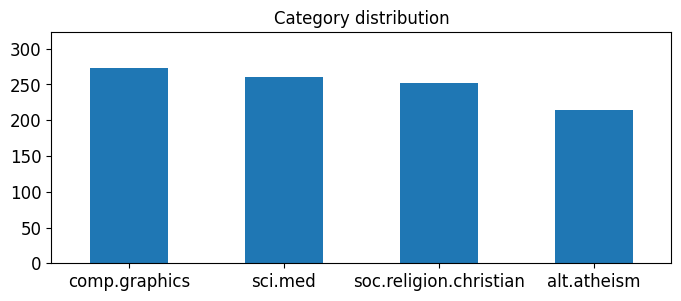

In [223]:
# Answer here
import matplotlib.pyplot as plt
%matplotlib inline

X_sample = X.sample(n=1000) #random state

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, max(X_sample.category_name.value_counts())+50], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

---

## Exercise 8
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.

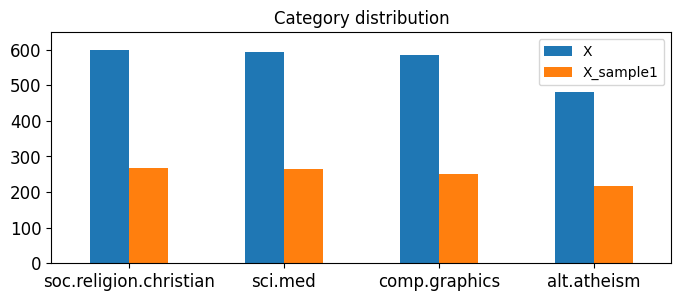

In [224]:
# Answer here
comparision = pd.concat([X.category_name.value_counts(), X_sample1.category_name.value_counts()], axis=1)
comparision = comparision.set_axis(['X', 'X_sample1'], axis='columns', copy=False)
comparision.plot(kind = 'bar',
                 title = 'Category distribution',
                 ylim = [0, max(X.category_name.value_counts())+50], 
                 rot = 0, fontsize = 12, figsize = (8,3))
plt.show()

---

## Exercise 9
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [225]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
analyze = count_vect.build_analyzer()
analyze(X.text[0])

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

---

## Exercise 10
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [226]:
# Answer here
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

location_1 = np.where(X_counts[4:5, 0:100].toarray() == 1)
index_2 = location_1[1][1]
print("Another 1 represents the ", count_vect.get_feature_names_out()[index_2:index_2+1])


Another 1 represents the  ['01']


---

## Exercise 11
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

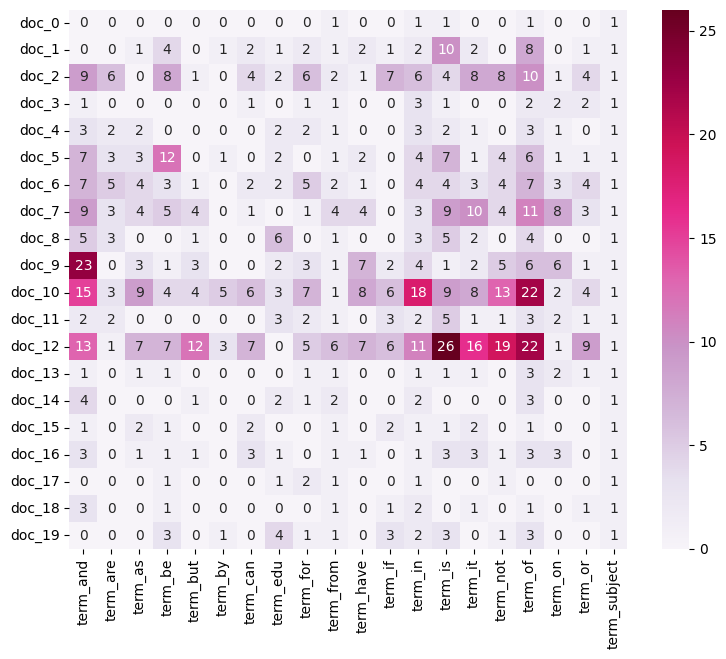

In [227]:
# Answer here
import seaborn as sns

count_vect = CountVectorizer(max_features=30)
X_counts = count_vect.fit_transform(X.text)

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[:20]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[:20]]
plot_z = X_counts[0:20, 0:20].toarray()   

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=26, annot=True)

---

## Exercise 12
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

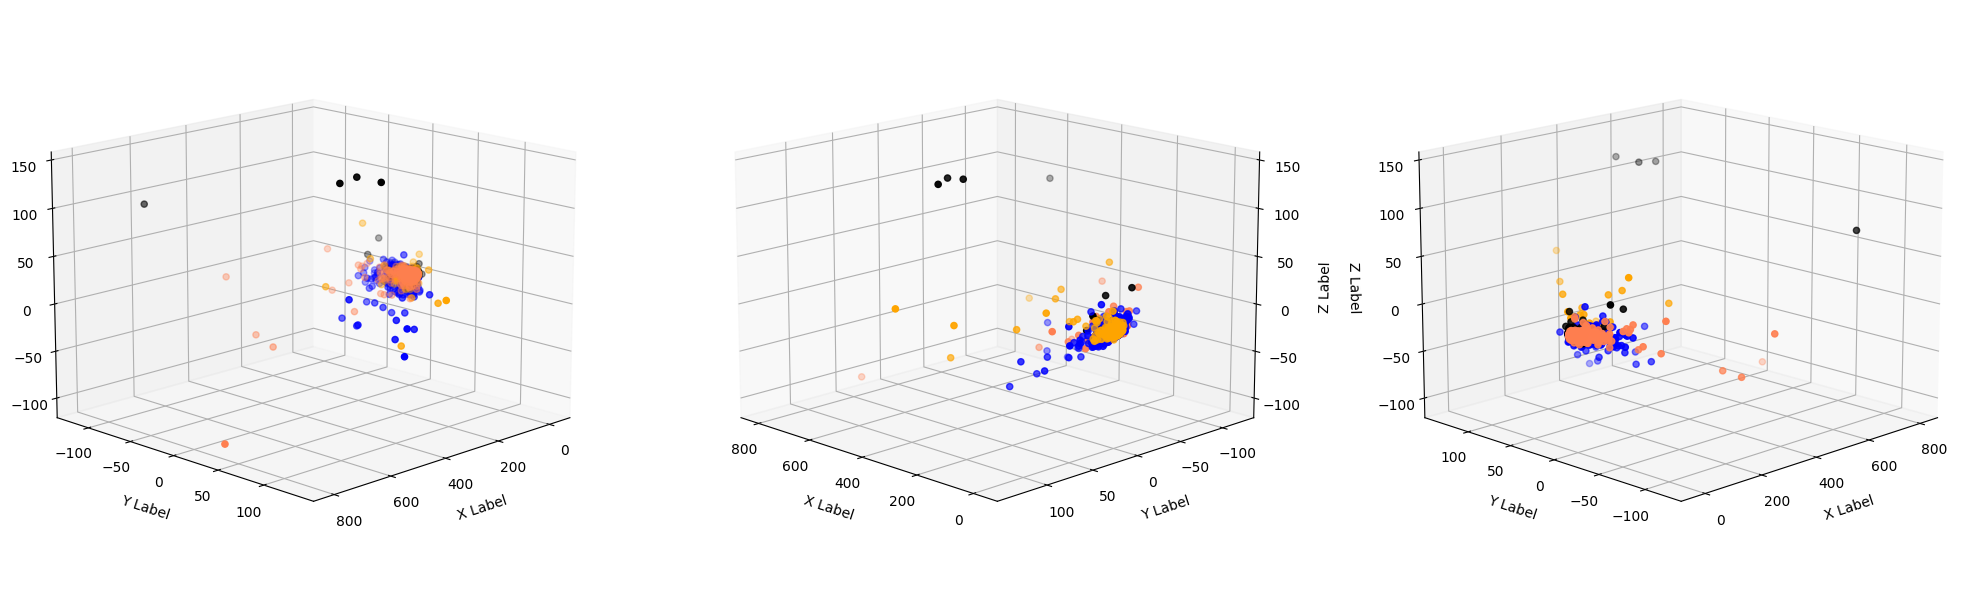

In [228]:
# Answer here
from sklearn.decomposition import PCA

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'orange']

fig = plt.figure(figsize = (25,10))

ax = []    # plot 3 3D-plot in a list

for i in range(3):
    ax.append(fig.add_subplot(1, 3, i+1, projection='3d'))
    for c, category in zip(col, categories):
        x = X_reduced[X['category_name'] == category].T[0]
        y = X_reduced[X['category_name'] == category].T[1]
        z = X_reduced[X['category_name'] == category].T[2]
        ax[i].scatter(x, y, z, c = c, marker = 'o')

    ax[i].set_xlabel('\nX Label')
    ax[i].set_ylabel('\nY Label')
    ax[i].set_zlabel('\nZ Label')
    
    ax[i].view_init(elev=15, azim=45*(2*i+1))  # view in 3 different degree (45, 135, 225)

plt.show()

### descrition:
1. We see that the 2D plot can be regarded as a 3D plot in a plane view from a certain angle.
2. For different angle of 3D plot, we can see more detail information about the distribution of these data. We can use it for deeper analysis.

---

## Exercise 13
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

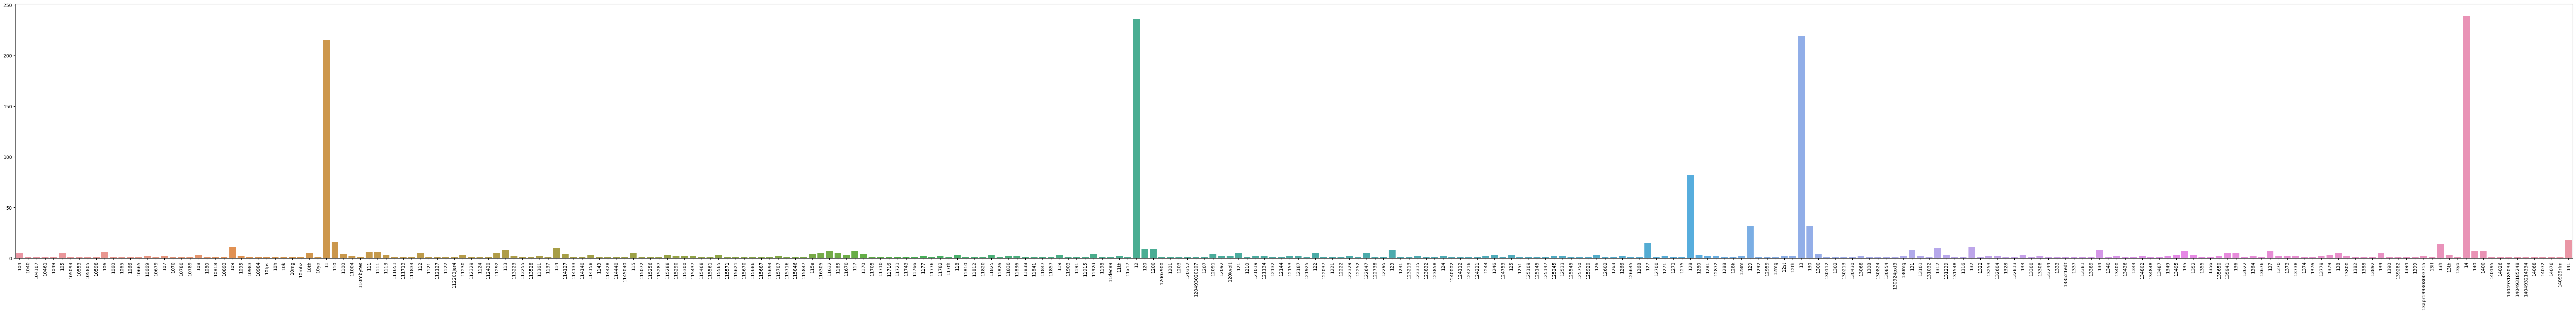

In [229]:
# Answer here

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
    
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[300:600], 
            y=term_frequencies[300:600])
g.set_xticklabels(count_vect.get_feature_names_out()[300:600], rotation = 90);

---

## Exercise 14
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

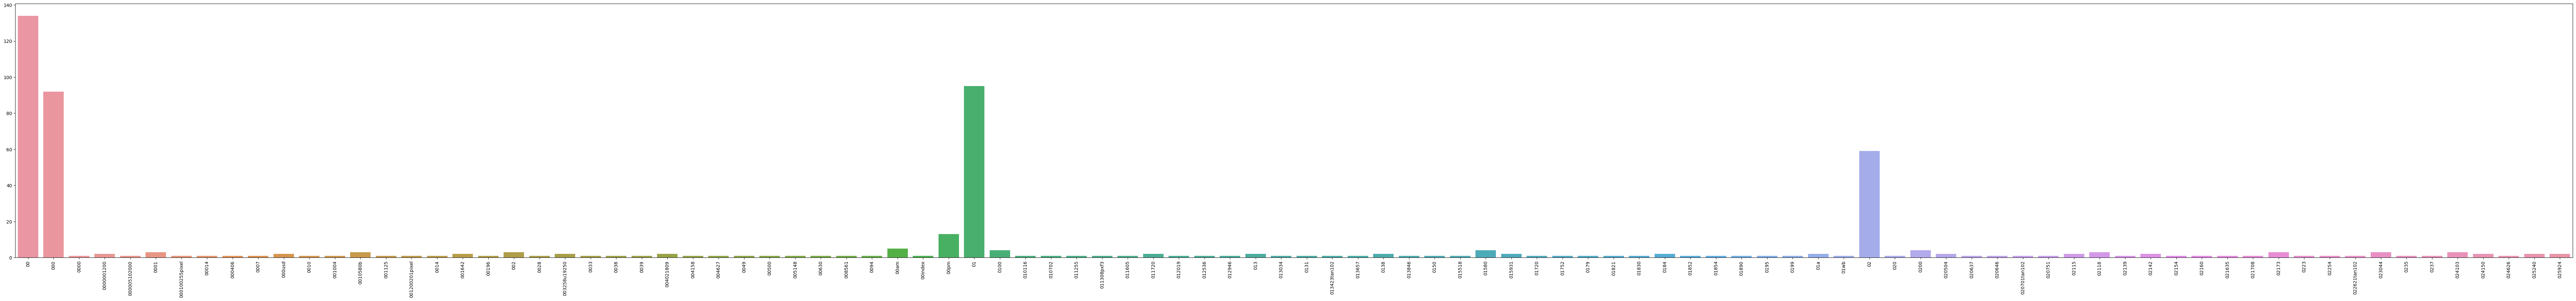

In [230]:
# Answer here
frequencies_filter = [x for x in term_frequencies if x > 600]
frequencies_filter_term = [count_vect.get_feature_names_out()[y] for y in range(term_frequencies.shape[0]) if term_frequencies[y] > 600]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=frequencies_filter_term[:100], 
            y=term_frequencies[:100])
g.set_xticklabels(count_vect.get_feature_names_out()[:100], rotation = 90);

---

## Exercise 15
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

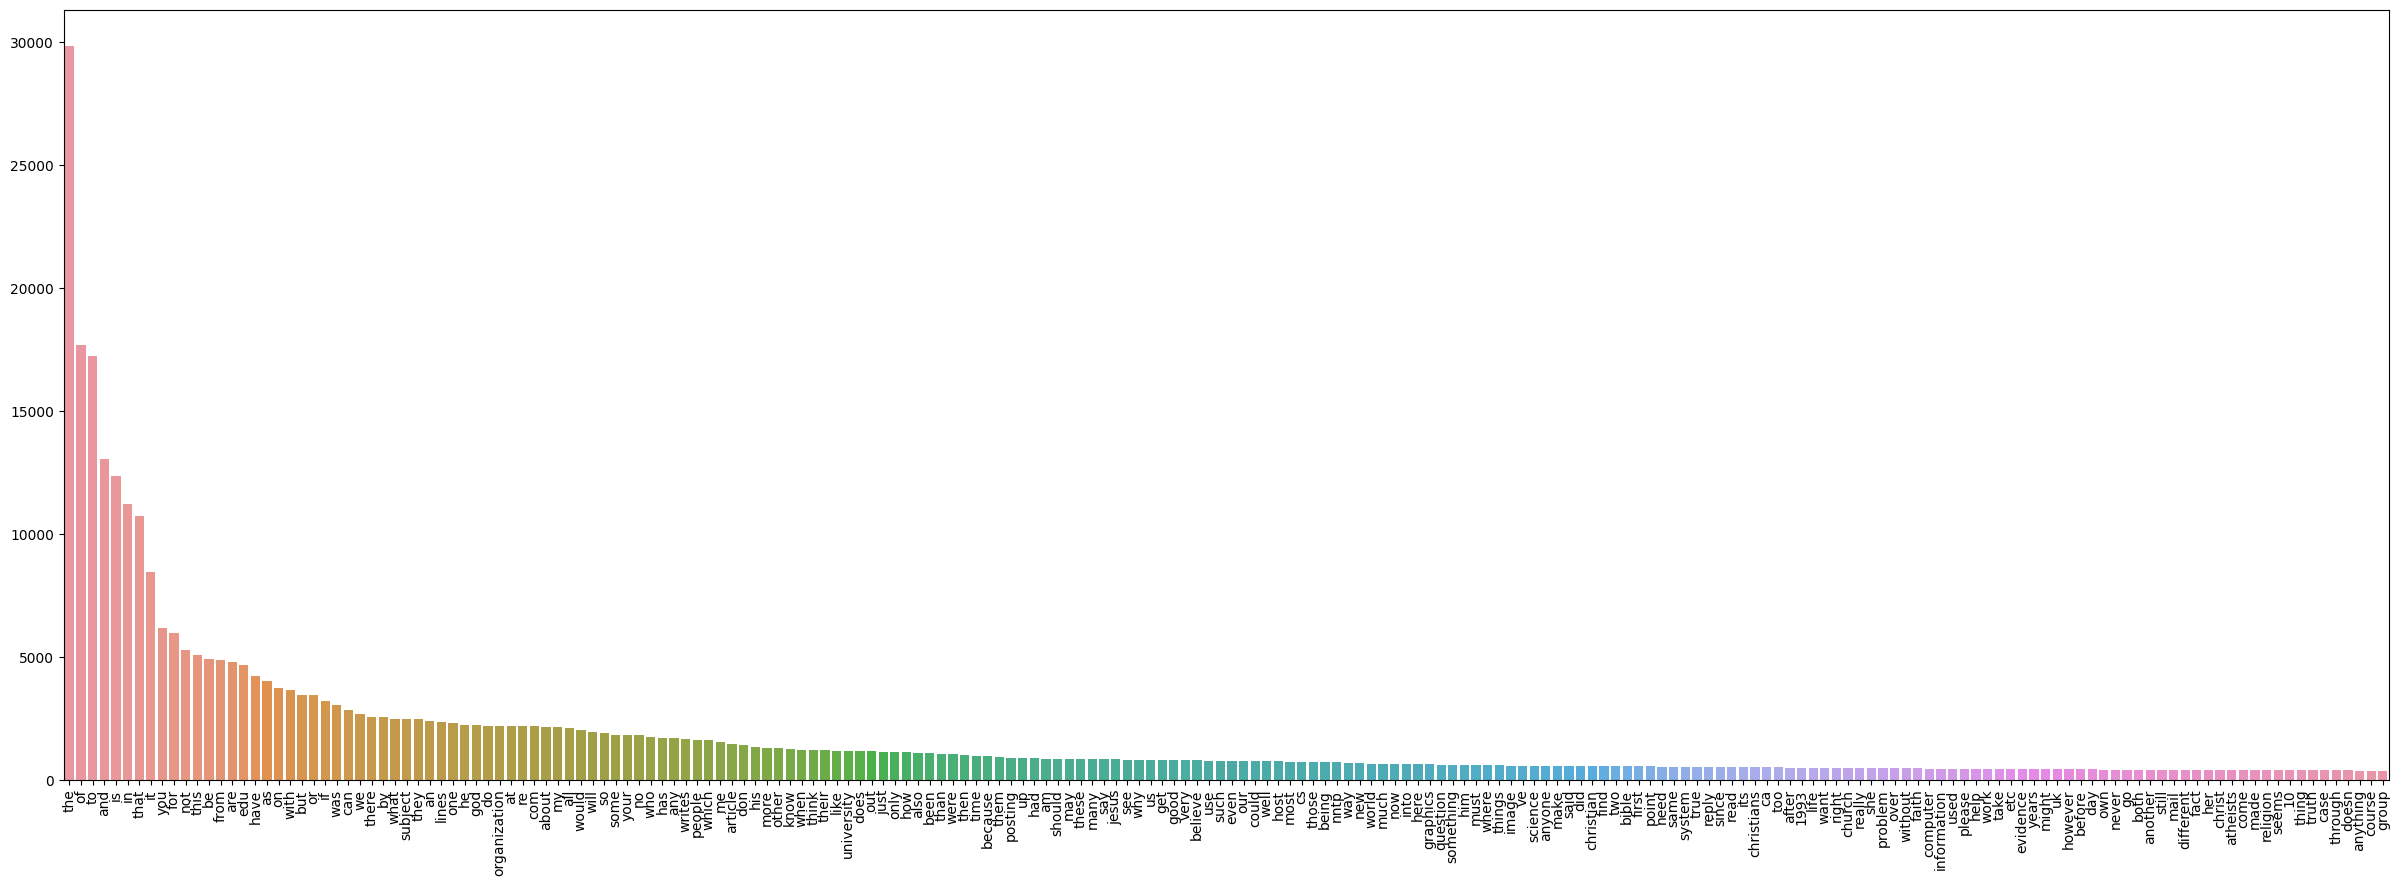

In [231]:
# Answer here
sort_frequencies = np.sort(term_frequencies)[::-1]
sort_term = np.argsort(term_frequencies)[::-1]
plt.subplots(figsize=(30, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[sort_term[:200]], y=sort_frequencies[:200])
g.set_xticklabels(count_vect.get_feature_names_out()[sort_term[:200]], rotation = 90);

---

## Exercise 16
Try to generate the binarization using the `category_name` column instead. Does it work?

#### Yes, it can work. ```category``` and ```category_name``` are both represent values.( ```category```is ```int``` type, and ```category_name``` is ```str``` type)

In [232]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()

mlb.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"


---

# Part 2: do same process from the DM2022-Lab1-Master on the new dataset.

## 1. The Data (no process)

## 2. Data Preparation

In [233]:
# categories
categories = ['amazon', 'imdb', 'yelp']
# column
columns=['sentence', 'score']

# load data
amazon = pd.read_table("sentiment labelled sentences/amazon_cells_labelled.txt",header=None,names=columns)
imdb= pd.read_table("sentiment labelled sentences/imdb_labelled.txt",header=None,names=columns)
yelp= pd.read_table("sentiment labelled sentences/yelp_labelled.txt",header=None,names=columns)

# add websites column
amazon['websites'] = 'amazon'
imdb['websites'] = 'imdb'
yelp['websites'] = 'yelp'

# concatenate 3 dataset
dataset = pd.concat([amazon,imdb,yelp], ignore_index=True)

In [234]:
dataset

,sentence,score,websites
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon
...,...,...,...
2743,I think food should have flavor and texture an...,0,yelp
2744,Appetite instantly gone.,0,yelp
2745,Overall I was not impressed and would not go b...,0,yelp
2746,"The whole experience was underwhelming, and I ...",0,yelp


In [235]:
# do same process from the DM2022-Lab1-Master
dataset[0:2]

,sentence,score,websites
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon


In [236]:
len(dataset[0:])

2748

In [237]:
dataset.websites[995:1005]

995     amazon
996     amazon
997     amazon
998     amazon
999     amazon
1000      imdb
1001      imdb
1002      imdb
1003      imdb
1004      imdb
Name: websites, dtype: object

---

## 3. Data Transformation

### 3.1 Converting Dictionary into Pandas Dataframe (have done)

### 3.2 Familiarizing yourself with the Data

In [238]:
# query last 10 data with sentence and score
dataset[-10:][['sentence', 'score']]

,sentence,score
2738,The refried beans that came with my meal were ...,0
2739,Spend your money and time some place else.,0
2740,A lady at the table next to us found a live gr...,0
2741,the presentation of the food was awful.,0
2742,I can't tell you how disappointed I was.,0
2743,I think food should have flavor and texture an...,0
2744,Appetite instantly gone.,0
2745,Overall I was not impressed and would not go b...,0
2746,"The whole experience was underwhelming, and I ...",0
2747,"Then, as if I hadn't wasted enough of my life ...",0


In [239]:
# use loc
dataset.loc[:10, 'sentence']

0     So there is no way for me to plug it in here i...
1                           Good case, Excellent value.
2                                Great for the jawbone.
3     Tied to charger for conversations lasting more...
4                                     The mic is great.
5     I have to jiggle the plug to get it to line up...
6     If you have several dozen or several hundred c...
7           If you are Razr owner...you must have this!
8                   Needless to say, I wasted my money.
9                      What a waste of money and time!.
10                      And the sound quality is great.
Name: sentence, dtype: object

In [240]:
# use iloc
dataset.iloc[:10, 0]

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
7          If you are Razr owner...you must have this!
8                  Needless to say, I wasted my money.
9                     What a waste of money and time!.
Name: sentence, dtype: object

In [241]:
# other query method
condition = dataset['score'] == 1
dataset[condition].iloc[::20][0:5]    # query every 20th record which 'score' is '1'. Only show the first 5 records. 


,sentence,score,websites
1,"Good case, Excellent value.",1,amazon
44,Excellent bluetooth headset.,1,amazon
78,"I love this phone , It is very handy and has a...",1,amazon
114,Absolutely great.,1,amazon
155,This phone is very fast with sending any kind ...,1,amazon


---

## 4. Data Mining using Pandas

### 4.1 Missing Values

In [242]:
# check missing values
dataset.isnull()

,sentence,score,websites
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2743,False,False,False
2744,False,False,False
2745,False,False,False
2746,False,False,False


In [243]:
# sum of each column
dataset.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,websites
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [244]:
# sum of each row
dataset.isnull().apply(lambda x: dmh.check_missing_values(x), axis = 1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2743    (The amoung of missing records is: , 0)
2744    (The amoung of missing records is: , 0)
2745    (The amoung of missing records is: , 0)
2746    (The amoung of missing records is: , 0)
2747    (The amoung of missing records is: , 0)
Length: 2748, dtype: object

In [245]:
# create dummy data and check
dummy_series = pd.Series(["dummy_record", 1], index=["sentence", "score"])
result_with_series = pd.concat([dataset, dummy_series.to_frame().T], ignore_index=True)
print(len(result_with_series))

result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

2749


,sentence,score,websites
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [246]:
# drop the data which have missing value
result_with_series.dropna(inplace=True)

# check
print(len(result_with_series))
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

2748


,sentence,score,websites
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


## 4.2 Dealing with Duplicate Data

In [247]:
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2743    False
2744    False
2745    False
2746    False
2747    False
Length: 2748, dtype: bool

In [248]:
sum(dataset.duplicated())

17

In [249]:
duplicate_data = dataset[dataset.duplicated()]
print(duplicate_data)

                                               sentence  score websites
285                                       Great phone!.      1   amazon
407                                        Works great.      1   amazon
524                                       Works great!.      1   amazon
543                             Don't buy this product.      0   amazon
744   If you like a loud buzzing to override all you...      0   amazon
748                                       Does not fit.      0   amazon
778                               This is a great deal.      1   amazon
792                                        Great Phone.      1   amazon
892                    Excellent product for the price.      1   amazon
896                                        Great phone.      1   amazon
1165                   Definitely worth checking out.        1     imdb
1387                                 Not recommended.        0     imdb
1590                                            10/10        1  

In [250]:
# drop duplicated data (keep the first data)
dataset.drop_duplicates(keep='first', inplace=True)

print(len(dataset))

2731


---

## 5 Data Preprocessing

### 5.1 Sampling

In [251]:
# sample 1000 data and print the first 5 data
data_sample = dataset.sample(n=1000)
data_sample[:5]

,sentence,score,websites
979,Not enough volume.,0,amazon
2415,And the chef was generous with his time (even ...,1,yelp
27,I didn't think that the instructions provided ...,0,amazon
2054,"Will never, ever go back.",0,yelp
1905,I ordered the Voodoo pasta and it was the firs...,1,yelp


In [252]:
# show the distribution of three websites
print(dataset.groupby("websites").count())
print("-"*40)
print(data_sample.groupby("websites").count())

          sentence  score
websites                 
amazon         990    990
imdb           745    745
yelp           996    996
----------------------------------------
          sentence  score
websites                 
amazon         373    373
imdb           280    280
yelp           347    347


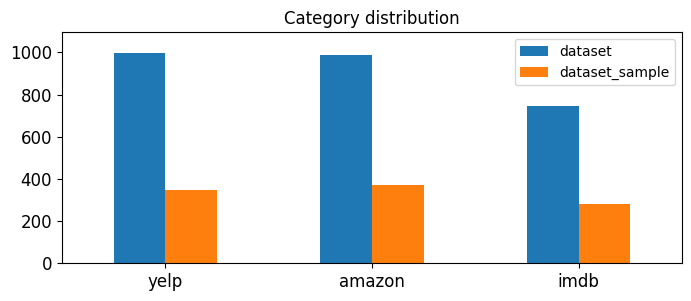

In [253]:
# plot
comparision = pd.concat([dataset.websites.value_counts(), data_sample.websites.value_counts()], axis=1)
comparision = comparision.set_axis(['dataset', 'dataset_sample'], axis='columns', copy=False)
comparision.plot(kind = 'bar',
                 title = 'Category distribution',
                 ylim = [0, max(dataset.websites.value_counts())*1.1], 
                 rot = 0, fontsize = 12, figsize = (8,3))
plt.show()

### 5.2 Feature Creation

In [254]:
# obtain the unigrams for each text
dataset['unigrams'] = dataset['sentence'].apply(lambda x: dmh.tokenize_text(x))
dataset[0:10]

,sentence,score,websites,unigrams
0,So there is no way for me to plug it in here i...,0,amazon,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,amazon,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,amazon,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,amazon,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,amazon,"[The, mic, is, great, .]"
5,I have to jiggle the plug to get it to line up...,0,amazon,"[I, have, to, jiggle, the, plug, to, get, it, ..."
6,If you have several dozen or several hundred c...,0,amazon,"[If, you, have, several, dozen, or, several, h..."
7,If you are Razr owner...you must have this!,1,amazon,"[If, you, are, Razr, owner, ..., you, must, ha..."
8,"Needless to say, I wasted my money.",0,amazon,"[Needless, to, say, ,, I, wasted, my, money, .]"
9,What a waste of money and time!.,0,amazon,"[What, a, waste, of, money, and, time, !, .]"


In [255]:
list(dataset[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

### 5.3 Feature subset selection

In [256]:
count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(dataset.sentence) #learn the vocabulary and return document-term matrix
print(data_counts[0])

  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1


In [257]:
data_counts.shape

(2731, 5155)

In [258]:
# obtain the feature names of the vectorizer
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [259]:
# we convert from sparse array to normal array
data_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [260]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

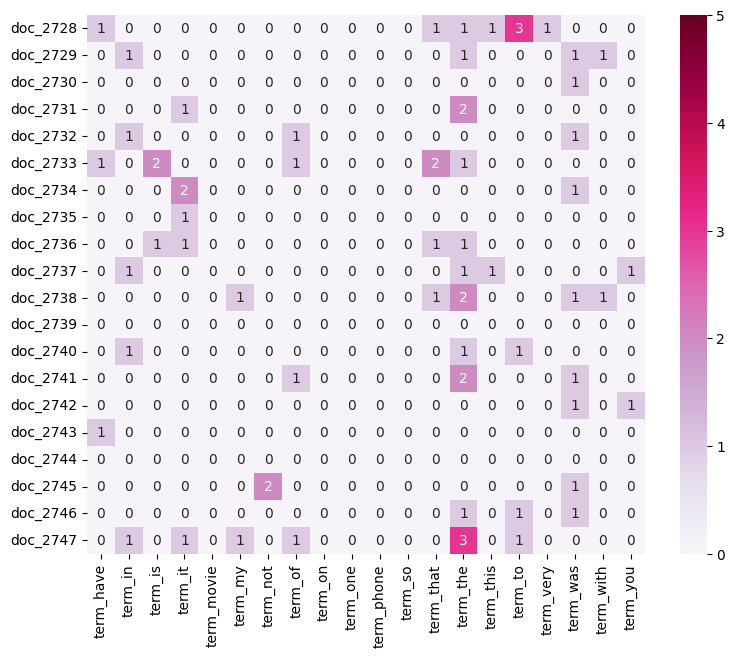

In [261]:
# use seaborn to show the heatmap
count_vect = CountVectorizer(max_features=30)
data_counts = count_vect.fit_transform(dataset.sentence)

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[-20:]]
plot_y = ["doc_"+ str(i) for i in list(dataset.index)[-20:]]
plot_z = data_counts[-20:, -20:].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=5, annot=True)

### 5.4 Dimensionality Reduction

In [262]:

count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(dataset.sentence)
# PCA 
# plot 2D
data_reduced = PCA(n_components = 2).fit_transform(data_counts.toarray()) 
data_reduced.shape

(2731, 2)

In [263]:
categories

['amazon', 'imdb', 'yelp']

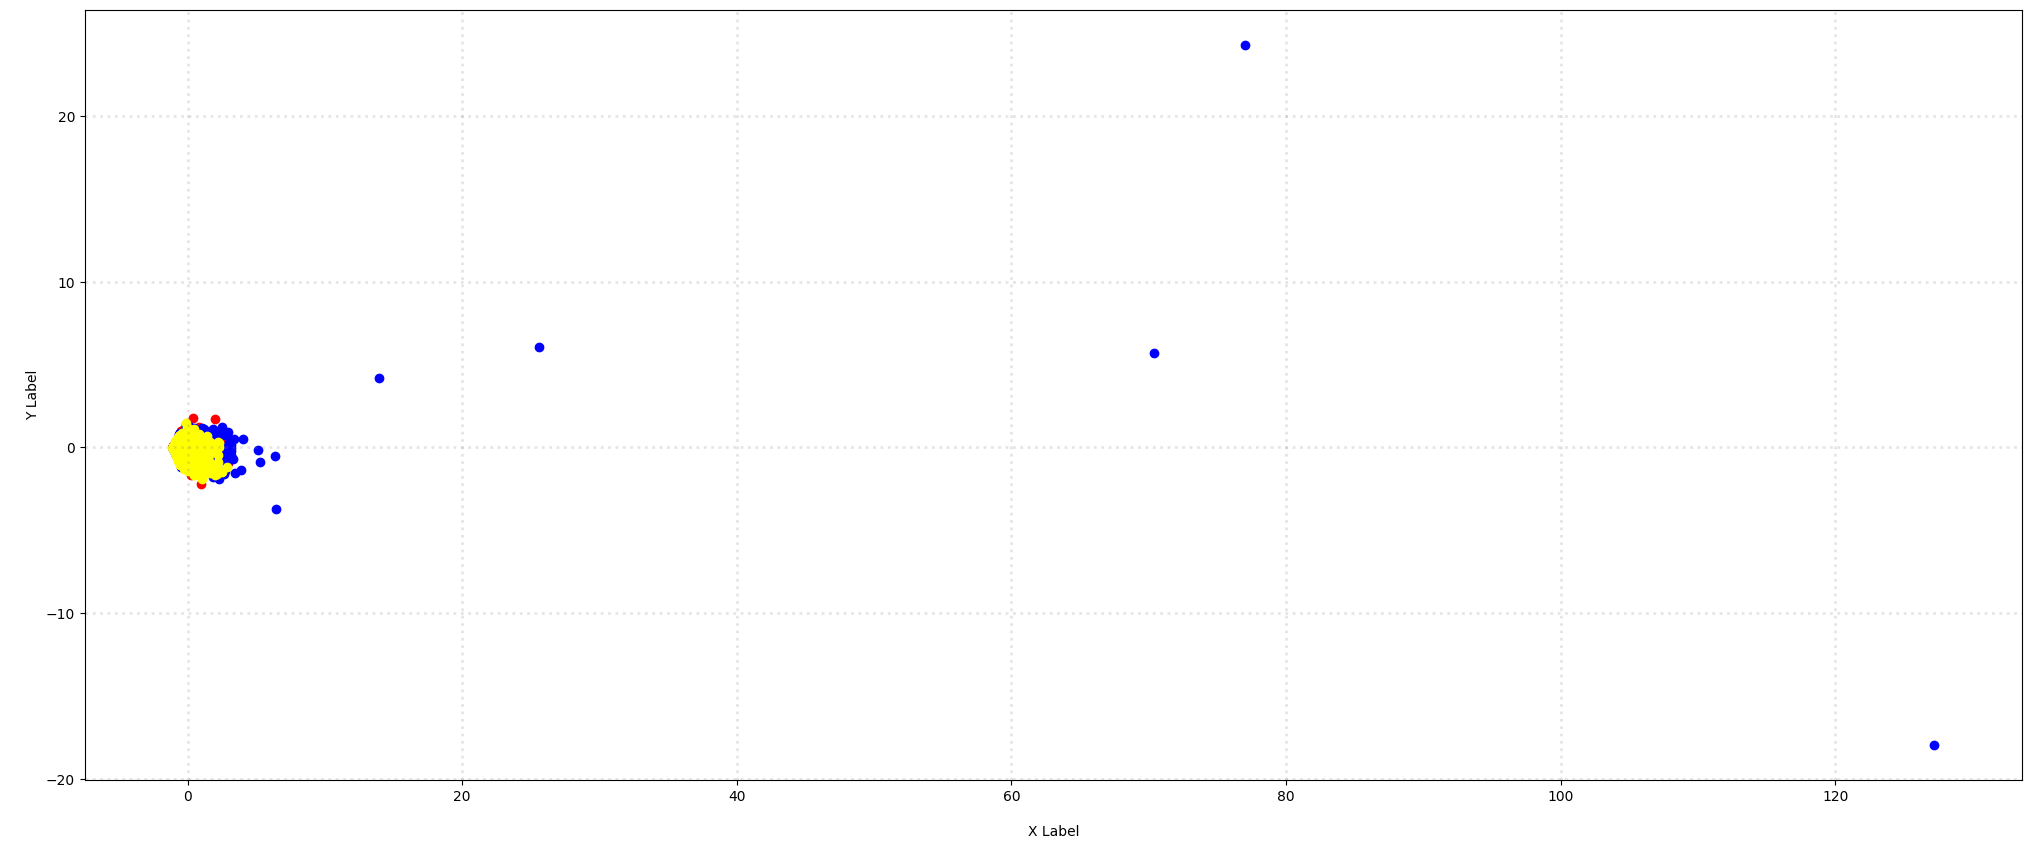

In [264]:
col = ['red', 'blue', 'yellow']

fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = data_reduced[dataset['websites'] == category].T[0]
    ys = data_reduced[dataset['websites'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

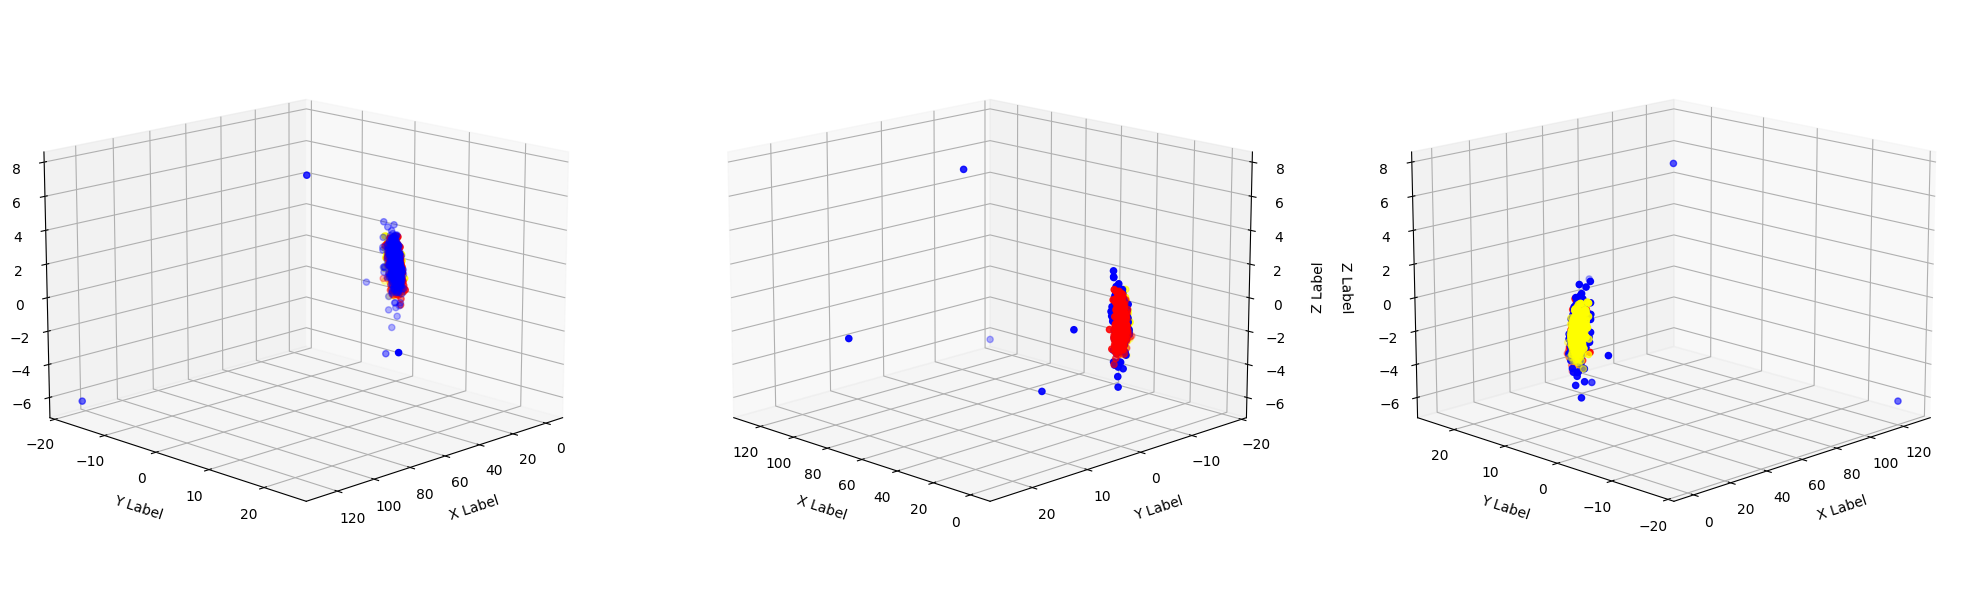

In [265]:
# plot 3D
data_reduced = PCA(n_components = 3).fit_transform(data_counts.toarray())
col = ['red', 'blue', 'yellow']

fig = plt.figure(figsize = (25,10))

ax = []    # plot 3 3D-plot in a list

for i in range(3):
    ax.append(fig.add_subplot(1, 3, i+1, projection='3d'))
    for c, category in zip(col, categories):
        x = data_reduced[dataset['websites'] == category].T[0]
        y = data_reduced[dataset['websites'] == category].T[1]
        z = data_reduced[dataset['websites'] == category].T[2]
        ax[i].scatter(x, y, z, c = c, marker = 'o')

    ax[i].set_xlabel('\nX Label')
    ax[i].set_ylabel('\nY Label')
    ax[i].set_zlabel('\nZ Label')
    
    ax[i].view_init(elev=15, azim=45*(2*i+1))  # view in 3 different degree (45, 135, 225)

plt.show()

---

### 5.5 Attribute Transformation / Aggregation


In [266]:
term_frequencies = []
for j in range(0,data_counts.shape[1]):
    term_frequencies.append(sum(data_counts[:,j].toarray()))

term_frequencies = np.asarray(data_counts.sum(axis=0))[0]
term_frequencies[0]

1

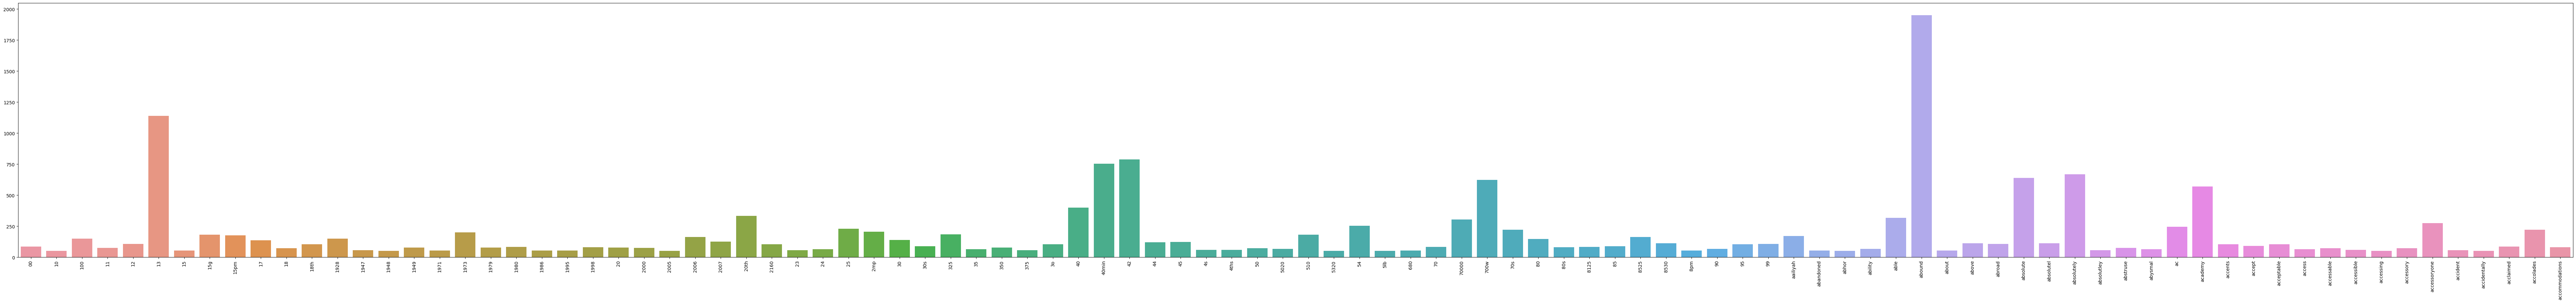

In [267]:
# plot
sort_frequencies = np.sort(term_frequencies)[::-1]
sort_term = np.argsort(term_frequencies)[::-1]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=sort_term[:100], y=sort_frequencies[:100])
g.set_xticklabels(count_vect.get_feature_names_out()[:100], rotation = 90);

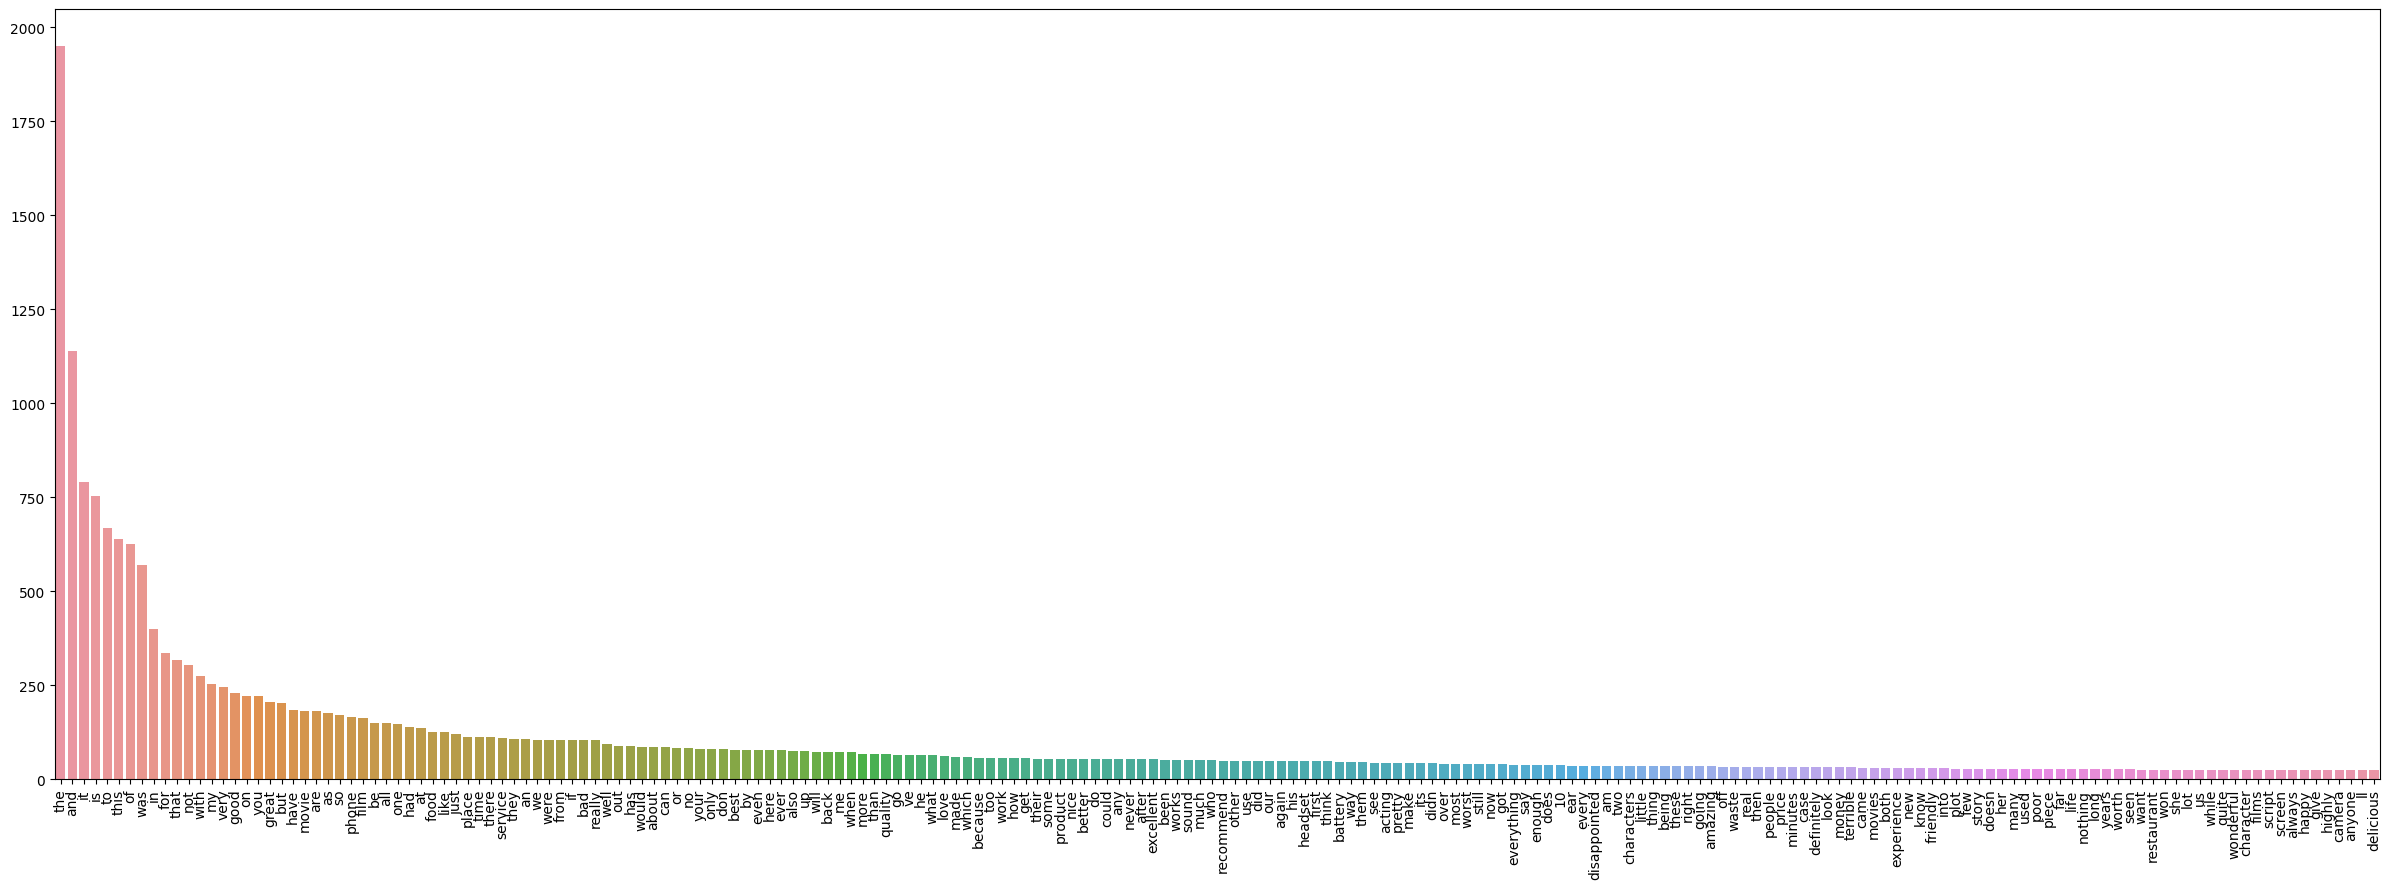

In [268]:
sort_frequencies = np.sort(term_frequencies)[::-1]
sort_term = np.argsort(term_frequencies)[::-1]
plt.subplots(figsize=(30, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[sort_term[:200]], y=sort_frequencies[:200])
g.set_xticklabels(count_vect.get_feature_names_out()[sort_term[:200]], rotation = 90);

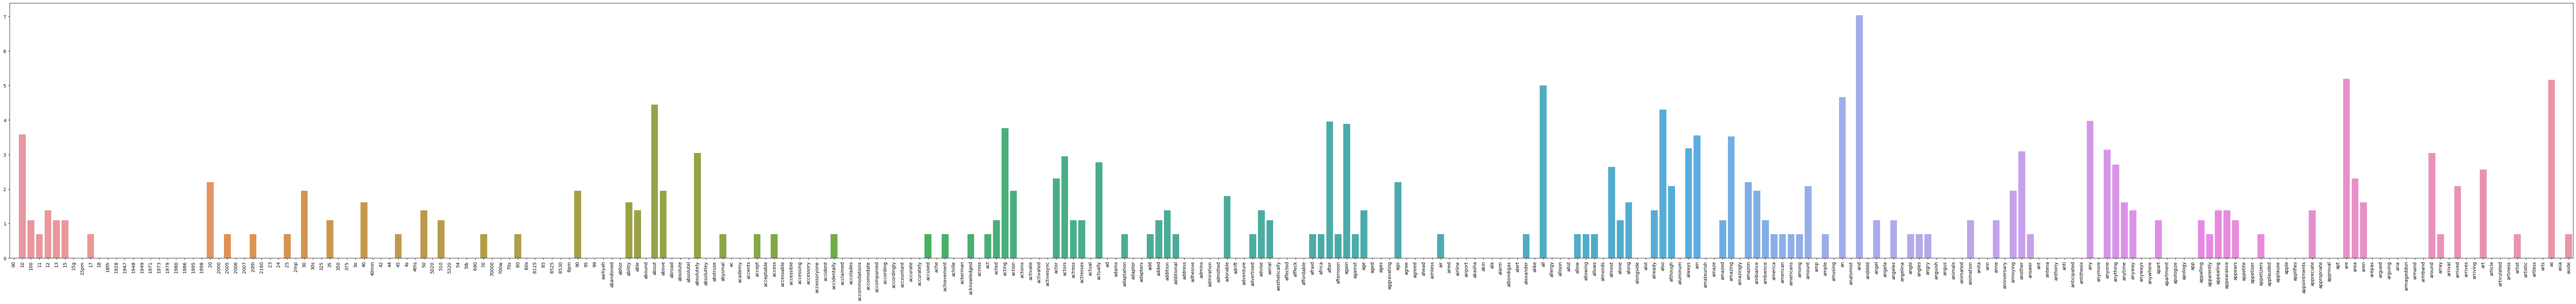

In [269]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### 5.6 Discretization and Binarization

In [270]:
# use 'websites' to labelbinarizer
mlb = preprocessing.LabelBinarizer()
mlb.fit(dataset.websites)

LabelBinarizer()

In [271]:
dataset['bin_category'] = mlb.transform(dataset['websites']).tolist()
dataset[985:995]

,sentence,score,websites,unigrams,bin_category
995,The screen does get smudged easily because it ...,0,amazon,"[The, screen, does, get, smudged, easily, beca...","[1, 0, 0]"
996,What a piece of junk.. I lose more calls on th...,0,amazon,"[What, a, piece, of, junk, .., I, lose, more, ...","[1, 0, 0]"
997,Item Does Not Match Picture.,0,amazon,"[Item, Does, Not, Match, Picture, .]","[1, 0, 0]"
998,The only thing that disappoint me is the infra...,0,amazon,"[The, only, thing, that, disappoint, me, is, t...","[1, 0, 0]"
999,"You can not answer calls with the unit, never ...",0,amazon,"[You, can, not, answer, calls, with, the, unit...","[1, 0, 0]"
1000,"A very, very, very slow-moving, aimless movie ...",0,imdb,"[A, very, ,, very, ,, very, slow-moving, ,, ai...","[0, 1, 0]"
1001,Not sure who was more lost - the flat characte...,0,imdb,"[Not, sure, who, was, more, lost, -, the, flat...","[0, 1, 0]"
1002,Attempting artiness with black & white and cle...,0,imdb,"[Attempting, artiness, with, black, &, white, ...","[0, 1, 0]"
1003,Very little music or anything to speak of.,0,imdb,"[Very, little, music, or, anything, to, speak,...","[0, 1, 0]"
1004,The best scene in the movie was when Gerardo i...,1,imdb,"[The, best, scene, in, the, movie, was, when, ...","[0, 1, 0]"


---

# 6. Data Exploration

In [272]:
# retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = dataset.iloc[300]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = dataset.iloc[1000]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = dataset.iloc[1500]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['Now I know that I made a wise decision.']
['And those baby owls were adorable.  ']
['The stories were as unbelievable as the actors.  ']


In [273]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [274]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.117851
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


---

# Part 3: Other task on the new dataset. 

## 1. Generate meaningful new data visualizations.

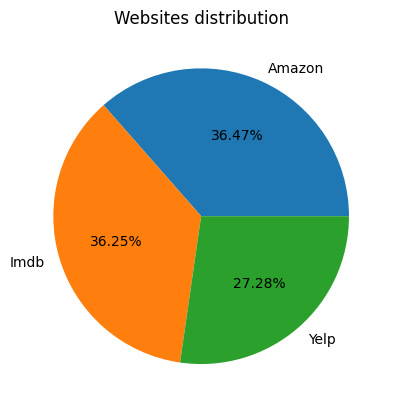

In [275]:
# pie chart to show the proportion of 3 websites data

label = ['Amazon', 'Imdb', 'Yelp']

plt.pie(dataset.websites.value_counts(), labels=label, autopct='%1.2f%%')  # autopct: Round to 2 decimal places
plt.title('Websites distribution')

plt.show()

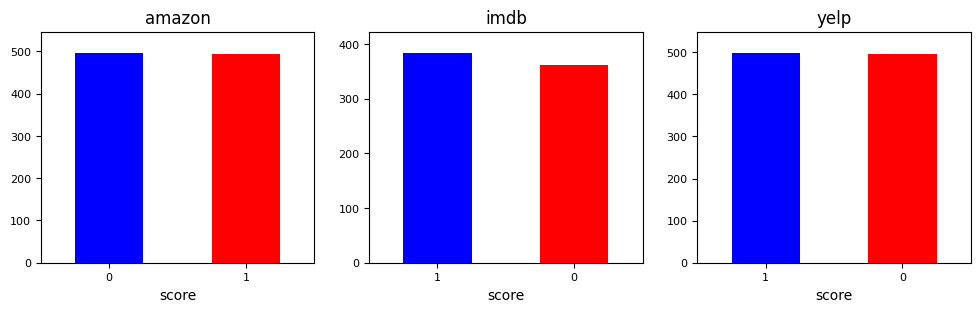

In [276]:
from turtle import color

for i in range(3):
    plt.subplot(1,3,i+1)
    data_web = dataset[dataset['websites'] == categories[i]]
    data_web.score.value_counts().plot(kind = 'bar',
                                        color = ['blue', 'red'],
                                        title = categories[i],
                                        xlabel='score',
                                        ylim = [0, max(data_web.score.value_counts())*1.1], 
                                        rot = 0, fontsize = 8, figsize = (12,3))
plt.show()

---

## 2. Generate **TF-IDF** features from the tokens of each text.

In [277]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector = TfidfVectorizer()
dataset_tfidf = tfidf_vector.fit_transform(dataset.sentence)
print(dataset_tfidf.shape)


(2731, 5155)


In [278]:
tfidf = pd.DataFrame(dataset_tfidf.toarray(), columns=tfidf_vector.get_feature_names_out())
tfidf

,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---

## 3. Implement a simple **Naive Bayes classifier**

In [279]:
from sklearn.naive_bayes import MultinomialNB     # MultinomialNB
from sklearn.model_selection import train_test_split


### 3.1　use word frequency features

In [280]:
# create a model
model_w = MultinomialNB()

# generate word frequency features
count_vect = CountVectorizer()
x = count_vect.fit_transform(dataset.sentence) 

# split train data and test data (8:2)
X_train, X_test, y_train, y_test = train_test_split(x, dataset.score, test_size=0.2, random_state=30)

# use the MultinomialNB model
model_w.fit(X_train,y_train)

# print the tesrt result
print('Use word frequency features:\n The accuracy is ' + str(model_w.score(X_test,y_test))) 

Use word frequency features:
 The accuracy is 0.8080438756855576


### 3.2　use TF-IDF features

In [281]:
# create a model
model_t = MultinomialNB()

# use TF-IDF features
x = tfidf_vector.fit_transform(dataset.sentence)

# split train data and test data (8:2)
X_train, X_test, y_train, y_test = train_test_split(x, dataset.score, test_size=0.2, random_state=30)

# use the MultinomialNB model
model_t.fit(X_train,y_train)

# print the tesrt result
print('Use TF-IDF features:\n The accuracy is ' + str(model_t.score(X_test,y_test))) 

Use TF-IDF features:
 The accuracy is 0.8336380255941499


#### Comment on the differences
The test result of using TF-IDF features is slightly better than the result using word frequency features. But there is no distinct difference between the two result. I think maybe this task is too simple to slove it.

---

## Part 4: Discussion

1. ```numpy``` is a very useful library. When calculating the term frequencies, ```for loop``` is a method to use. But it will take lots of time(about 2 mins). If we use the function in ```numpy```, it only took about 1 second.  
2. When using plot the heatmap and bar chart to show the term frequencies in each record, the result is sparse and it will waste a lo of space. So I use ```np.sort()```、```np.arsor()```and use ```max_features``` in ```CountVectorizer()``` to find the most frequenctly used terms. I can use less space to show the most result. 